* Veri Seti Linki : https://drive.google.com/open?id=16RAoquuIs-jE_apT1te38a_r9GKofLzw

* Google colab'da driveda çalışmak için gerekli kodu yazdım.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


* Keras kütüphanesini import ettim

In [2]:
import keras

Using TensorFlow backend.


* Verilerimin uzantısını değişkenlerde tutuyorum

In [0]:
train_dir = "/content/gdrive/My Drive/dataset/train"
validation_dir = "/content/gdrive/My Drive/dataset/validation"
test_dir = "/content/gdrive/My Drive/dataset/test"

* Eğitim ve validasyon verilerimi image data genarator fonksiyonu ile okudum.
* Görüntülerimin piksellerini 0 ile 1 arasına alarak normalize ettim.
* Verilerimin boyutunu, ayırması gereken batch boyutunu ve sınıf tipini belirttim.

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        batch_size=20,
        target_size=(300, 300),
        class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        batch_size=20,
        target_size=(300, 300),
        class_mode='binary')

Found 226 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


* Modelimizi sıralı bir şekilde oluşturuyoruz.
* İlk katman olarak girişi 300x300 pikselli 3 kanallı olduğunu bildiriyoruz.
* CNN katmanlarında strides'i 2x2 olarak belirttim. padding ile boyuttaki azalmanın yarı yarıya oluşunu sağladım.
* Çıkışı oluşturabilmemiz için 3 kanalı tek kanala düşürmemiz gerekiyor. Bunun için flatten kullanıyoruz.
* Flatten ile düzleştirdikten sonra tam bağımlı katmandan geçiriyoruz.
* Tahmini 0 ile 1 arasında oluşturmak için sigmoid aktivasyon fonksiyonu ile çıkış katmanını oluşturuyoruz.

In [0]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), strides=(2, 2), activation='relu', padding="same", input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), strides=(2, 2), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

* Oluşturduğumuz modelin iç yapısını ve her katmanın çıkışını görmek için modelin özetine bakıyoruz.

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)        

* Modeli oluşturduktan sonra kullanacağımız loss fonksiyonu, optimizer ve metriği verdim.
* İkili sınıflandırma yaptığımızdan dolayı loss fonksiyonu olarak binary_crossentropy kullandım.
* Rmsprop genel olarak iyi sonuçlar verdiği için optimizer olarak onu kullanmayı tercih ettim. Learning rate olarak 0.001'i uygun gördüm.
* Metrik olarak accuracy'i tercih ettim.

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=0.001), metrics=['acc'])

* Verilerimi image date generator ile okuduğumdan dolayı model.fit yerine model.fit_generator ile eğittim.
* Epoch sayısını 30 olarak verdim.

In [8]:
history = model.fit_generator(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
12/12 [==============================] - 2s 176ms/step - loss: 0.7008 - acc: 0.5619 - val_loss: 0.6640 - val_acc: 0.7857
Epoch 2/30
12/12 [==============================] - 1s 87ms/step - loss: 0.5893 - acc: 0.6814 - val_loss: 0.8539 - val_acc: 0.6250
Epoch 3/30
12/12 [==============================] - 1s 88ms/step - loss: 0.5310 - acc: 0.7434 - val_loss: 0.4886 - val_acc: 0.7679
Epoch 4/30
12/12 [==============================] - 1s 87ms/step - loss: 0.4304 - acc: 0.8053 - val_loss: 0.3003 - val_acc: 0.7857
Epoch 5/30
12/12 [==============================] - 1s 86ms/step - loss: 0.4121 - acc: 0.8009 - val_loss: 0.6023 - val_acc: 0.7500
Epoch 6/30
12/12 [==============================] - 1s 87ms/step - loss: 0.3677 - acc: 0.8230 - val_loss: 0.2088 - val_acc: 0.8571
Epoch 7/30
12/12 [==============================] - 1s 87ms/step - loss: 0.3588 - acc: 0.8451 - val_loss: 0.2297 - val_acc: 0.8571
Epoch 8/30
12/12 [==============================] - 1s 86ms/step - loss: 0.3507 - 

* Eğitimimizin durumunu görmek için matplotlib kütüphanesi ile eğitim ve validasyonumuz için başarım ve kaybın görselleştirmesini yapıyoruz.




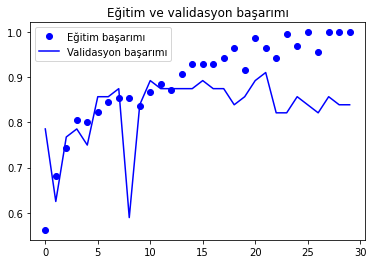

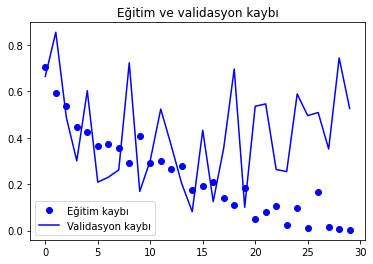

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Eğitim başarımı')
plt.plot(epochs, val_acc, 'b', label='Validasyon başarımı')
plt.title('Eğitim ve validasyon başarımı')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Eğitim kaybı')
plt.plot(epochs, val_loss, 'b', label='Validasyon kaybı')
plt.title('Eğitim ve validasyon kaybı')
plt.legend()
plt.show()

* Grafiklerde eğitim verileri üzerindeki aşırı öğrenme yani ezberi görebiliyoruz. eğitin verileri üzerindeki başarım %100ü bulurken validasyon verileri üzerindeki başarım daha düşüktür.
* Loss grafiğinde de aynı şeyleri görebiliriz. Eğitim kaybı düşerken validasyon kaybı aynı şekilde düşmemiştir. 
* Başarım ve kayıp verilerine göre eğitimi 12.-13. epochta kesmek mantıklıdır.

# **İKİNCİ ADIM: Data augmentation yöntemi ile deney tekrarı**
* Eğitim verilerini tekrardan bu sefer veri seti büyütme yöntemi ile tekrardan okudum.
* Verileri ters çevirme, zoomlama, yön değiştirme gibi veri seti büyütme yöntemleri ile okudum.

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(300, 300),
        batch_size=20,
        class_mode='binary')

Found 226 images belonging to 2 classes.


* Modelin ağırlıklarını eğitim öncesi haline getirmek için baştan oluşturuyorum.

In [0]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), strides=(2, 2), activation='relu', padding="same", input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), strides=(2, 2), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

* Sıfırlanan model için gerekli fonksiyonları tekrardan aynı şekilde veriyorum.

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=0.001), metrics=['acc'])

* Veri seti büyütme yöntemi kullandığım eğitim verileri ile modeli tekrar eğitiyorum.

In [13]:
history = model.fit_generator(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
12/12 [==============================] - 5s 425ms/step - loss: 0.6993 - acc: 0.5575 - val_loss: 0.6335 - val_acc: 0.7679
Epoch 2/30
12/12 [==============================] - 5s 420ms/step - loss: 0.5115 - acc: 0.7743 - val_loss: 0.4207 - val_acc: 0.8571
Epoch 3/30
12/12 [==============================] - 5s 421ms/step - loss: 0.4253 - acc: 0.7965 - val_loss: 0.3811 - val_acc: 0.8750
Epoch 4/30
12/12 [==============================] - 5s 419ms/step - loss: 0.4779 - acc: 0.7832 - val_loss: 0.5358 - val_acc: 0.8214
Epoch 5/30
12/12 [==============================] - 5s 416ms/step - loss: 0.4148 - acc: 0.8407 - val_loss: 0.6394 - val_acc: 0.8393
Epoch 6/30
12/12 [==============================] - 5s 418ms/step - loss: 0.4634 - acc: 0.8053 - val_loss: 0.3382 - val_acc: 0.8571
Epoch 7/30
12/12 [==============================] - 5s 416ms/step - loss: 0.3698 - acc: 0.8451 - val_loss: 0.2973 - val_acc: 0.8393
Epoch 8/30
12/12 [==============================] - 5s 422ms/step - loss: 0.

* Veri seti büyütme yöntemi ile elde ettiğimiz değişikliği görmek için yeniden görselleştirdim.

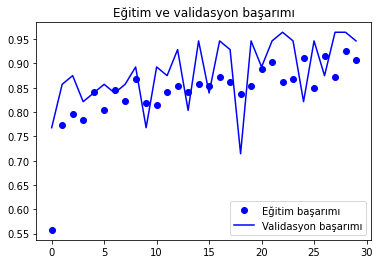

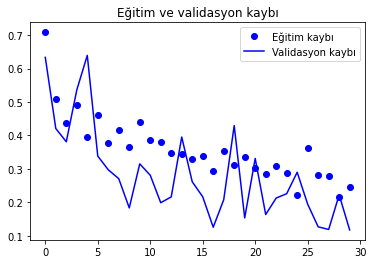

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Eğitim başarımı')
plt.plot(epochs, val_acc, 'b', label='Validasyon başarımı')
plt.title('Eğitim ve validasyon başarımı')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Eğitim kaybı')
plt.plot(epochs, val_loss, 'b', label='Validasyon kaybı')
plt.title('Eğitim ve validasyon kaybı')
plt.legend()
plt.show()

* bir eğitimin başarısını eğitim ve validasyon değerlerinin birbirine yakın oluşu ile ölçeriz. veri seti büyütme yöntemsiz olan eğitimimizde eğitim başarımı yüksekken validasyon başarımı yüksek değildi. Aynı zamanda eğitim lossu düşükken validasyon lossu aynı oranda düşük değildi.
* Veri seti büyütme yönteminde ise eğitim ve validasyon değerleri sürekli olarak birbirlerine yakındı. Bu eğitimimizin iyi olduğunu overfit etmediğini gösterir. 

# **ÜÇÜNCÜ ADIM: Dropout  ile deney tekrarı**
* Aynı modelimize dropout ekleyerek modelin başarımındaki değişimi gözlemleyeceğim.
* Dropout flattenden sonra kullanılarak belirttiğimiz %50 oranında rastgele düğümleri kapatarak overfit sorununu çözmemize yardımcı olur.

In [0]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), strides=(2, 2), activation='relu', padding="same", input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), strides=(2, 2), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

* Modelim için kullandığımız fonksiyonları aynı şekilde belirttim.

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=0.001), metrics=['acc'])

* Dropoutlu modeli eğitiyorum.

In [17]:
history = model.fit_generator(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
12/12 [==============================] - 5s 426ms/step - loss: 0.6443 - acc: 0.6239 - val_loss: 1.1063 - val_acc: 0.5000
Epoch 2/30
12/12 [==============================] - 5s 418ms/step - loss: 0.5231 - acc: 0.7522 - val_loss: 0.3297 - val_acc: 0.8571
Epoch 3/30
12/12 [==============================] - 5s 422ms/step - loss: 0.4270 - acc: 0.8319 - val_loss: 0.4491 - val_acc: 0.8750
Epoch 4/30
12/12 [==============================] - 5s 417ms/step - loss: 0.4326 - acc: 0.8097 - val_loss: 0.3683 - val_acc: 0.8750
Epoch 5/30
12/12 [==============================] - 5s 423ms/step - loss: 0.3628 - acc: 0.8407 - val_loss: 0.2880 - val_acc: 0.8571
Epoch 6/30
12/12 [==============================] - 5s 419ms/step - loss: 0.5190 - acc: 0.8009 - val_loss: 0.2280 - val_acc: 0.8750
Epoch 7/30
12/12 [==============================] - 5s 420ms/step - loss: 0.3844 - acc: 0.8363 - val_loss: 0.1828 - val_acc: 0.8750
Epoch 8/30
12/12 [==============================] - 5s 417ms/step - loss: 0.

* Dropoutun etkisini görmek için görselleştirmeyi yeniden gerçekleştirdim.

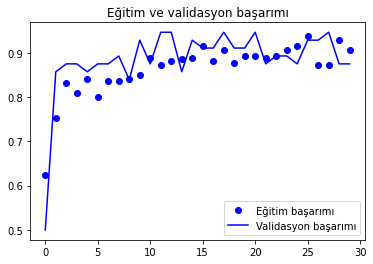

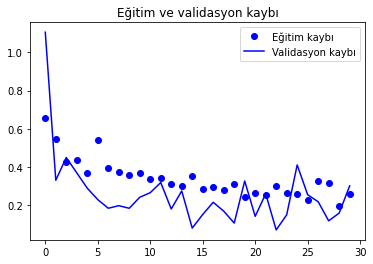

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Eğitim başarımı')
plt.plot(epochs, val_acc, 'b', label='Validasyon başarımı')
plt.title('Eğitim ve validasyon başarımı')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Eğitim kaybı')
plt.plot(epochs, val_loss, 'b', label='Validasyon kaybı')
plt.title('Eğitim ve validasyon kaybı')
plt.legend()
plt.show()

* Dropoutu eklemek eğitim ve validasyon değerlerini birbirine daha çok yaklaştırdı. Yani istediğimiz gibi ezberi engellemekte bize yardımcı oldu.

**DÖRDÜNCÜ ADIM: Epoch Ayarı**
* İncelediğim son görselleştirmede bir overfit noktası gözlemlenmiyor. Epoch sayısı arttırılarak daha yüksek bir başarım elde edilebileceğini gözlemlemekteyim. Epoch sayısını 40 yaparak başarımın daha artıp artmayacağını gözlemleyeceğim.
* Modelin ağırlıklarını eğitim öncesi haline getirmek için aynı şekilde oluşturdum.

In [0]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), strides=(2, 2), activation='relu', padding="same", input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), strides=(2, 2), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

* Modelim için kullandığımız fonksiyonları aynı şekilde belirttim.

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=0.001), metrics=['acc'])

* 40 epochta eğitimi gerçekleştirdim.

In [22]:
history = model.fit_generator(
      train_generator,
      epochs=40,
      validation_data=validation_generator)

Epoch 1/40
12/12 [==============================] - 5s 423ms/step - loss: 0.7282 - acc: 0.5133 - val_loss: 0.6753 - val_acc: 0.6786
Epoch 2/40
12/12 [==============================] - 5s 414ms/step - loss: 0.6912 - acc: 0.5398 - val_loss: 0.6588 - val_acc: 0.8571
Epoch 3/40
12/12 [==============================] - 5s 418ms/step - loss: 0.6418 - acc: 0.6726 - val_loss: 0.5696 - val_acc: 0.6607
Epoch 4/40
12/12 [==============================] - 5s 417ms/step - loss: 0.5447 - acc: 0.7434 - val_loss: 0.3999 - val_acc: 0.8750
Epoch 5/40
12/12 [==============================] - 5s 421ms/step - loss: 0.4537 - acc: 0.7965 - val_loss: 0.3157 - val_acc: 0.8393
Epoch 6/40
12/12 [==============================] - 5s 417ms/step - loss: 0.5178 - acc: 0.8097 - val_loss: 0.3568 - val_acc: 0.7857
Epoch 7/40
12/12 [==============================] - 5s 419ms/step - loss: 0.3857 - acc: 0.8319 - val_loss: 0.2401 - val_acc: 0.8750
Epoch 8/40
12/12 [==============================] - 5s 414ms/step - loss: 0.

* 40 epochlı eğitim ile sonuçları görselleştirelim.

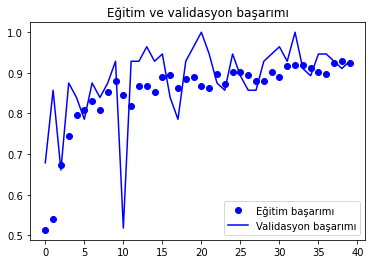

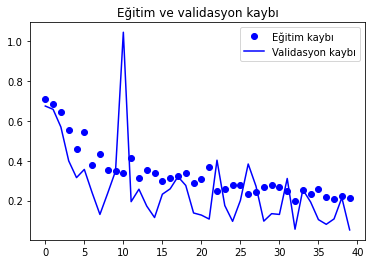

In [23]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Eğitim başarımı')
plt.plot(epochs, val_acc, 'b', label='Validasyon başarımı')
plt.title('Eğitim ve validasyon başarımı')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Eğitim kaybı')
plt.plot(epochs, val_loss, 'b', label='Validasyon kaybı')
plt.title('Eğitim ve validasyon kaybı')
plt.legend()
plt.show()

* 40 epochlı eğittiğimde çok fazla bir artış göremedim. Ancak yine de 30 epochtan biraz daha yüksek eğitim başarımı çıktı. Overfit hala gözlemleyememekteyim. 

* Son olarak ayırdığım test verileri ile modeldeki %lik başarımımı ölçtüm.

In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        batch_size=20,
        target_size=(300, 300),
        class_mode='binary')

Found 20 images belonging to 2 classes.


In [0]:
kayip, basarim = model.evaluate_generator(test_generator)

In [33]:
print("Başarım % :", basarim*100)
print("Kayıp % :", kayip*100)

Başarım % : 80.0000011920929
Kayıp % : 57.0702850818634
